## PART 2: Scale-free networks

#### First a couple of questions to make sure that you've actually read the text.

- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

1. Anomalous Regime (γ = 2) : for γ = 2 the degree of the biggest hub grows linearly with the system size, i.e. kmax ~ N. This forces the network into a hub and spoke configuration in which all nodes are close to each other because they all connect to the same central hub. In this regime the average path length does not depend on N.
2. Ultra-Small World (2 ‹ γ ‹ 3) : in this regime the average distance increases as lnlnN, a significantly slower growth than the lnN derived for random networks. We call networks in this regime ultra-small, as the hubs radically reduce the path length. They do so by linking to a large number of small-degree nodes, creating short distances between them.
3. Critical Point (γ = 3) : This value is of particular theoretical interest, as the second moment of the degree distribution does not diverge any longer. At this critical point the lnN dependence encountered for random networks returns. Yet, the calculations indicate the presence of a double logarithmic correction lnlnN [29, 31], which shrinks the distances compared to a random network of similar size.
4. Small World (γ > 3) : In this regime 〈k2〉 is finite and the average distance follows the small world result derived for random networks. While hubs continue to be present, for γ > 3 they are not sufficiently large and numerous to have a significant impact on the distance between the nodes.

- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
1. Sublinear Preferential Attachment (0 < α < 1): For any α > 0 new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution.
2. Linear Regime (α=1) : This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
3. Superlinear Preferential Attachment (α > 1) : For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-gets-richer process. The consequence of this is most obvious for α > 2, when the model predicts a winner-takes-all phenomenon

#### We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:

First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
Now add another node, connecting one of the existing nodes in proportion to their degree.
Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.
Plot the network.
Add more nodes until you have a 5000 node network.
What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.

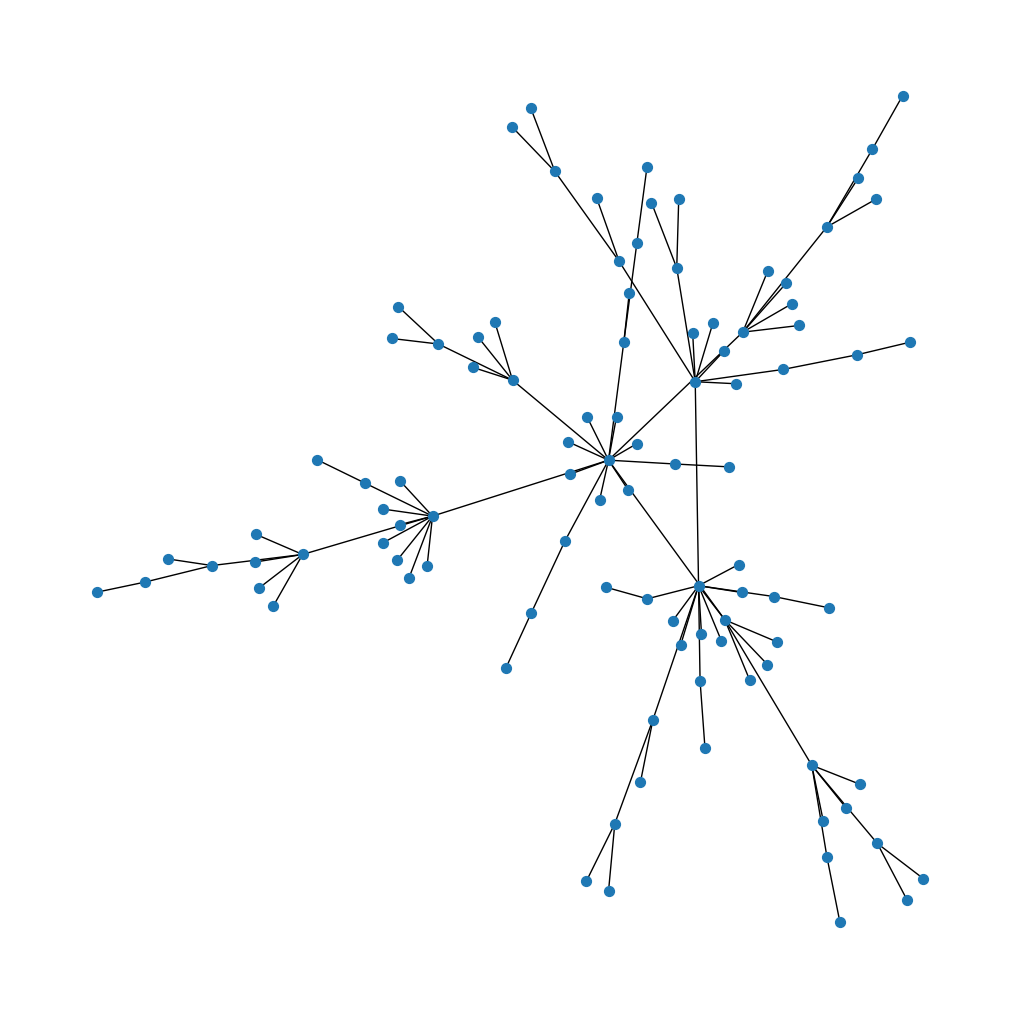

In [ ]:
'''First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
Now add another node, connecting one of the existing nodes in proportion to their degree.
Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. 
The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). 
That list contains each node in proportion to its connections, thus drawing a random node from that list 
(e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

Plot the network.
Add more nodes until you have a 5000 node network.
What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.'''

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

G = nx.Graph()
G.add_edge(0, 1)

for i in range(2, 100):
    # Create a list of all nodes proportional to their degree 
    # (by flattening the edge list, the node will appear as many times as its degree)
    node_options = np.array(G.edges()).flatten()
    # Select a random node from the list
    new_node = i
    target_node = random.choice(node_options) 
    G.add_edge(new_node, target_node)

plt.figure(figsize=(10, 10))
nx.draw(G, node_size=50)
plt.show()


array([ 0,  1,  0,  2,  0,  3,  0,  5,  0,  8,  0,  9,  0, 10,  0, 15,  0,
       16,  0, 18,  0, 20,  0, 22,  0, 28,  0, 29,  0, 31,  0, 34,  0, 35,
        0, 39,  0, 40,  0, 42,  0, 45,  0, 50,  0, 54,  0, 62,  0, 64,  0,
       66,  0, 74,  0, 75,  0, 83,  0, 96,  1, 11,  2,  4,  2,  6,  2,  7,
        2, 12,  2, 14,  2, 21,  2, 30,  2, 37,  2, 56,  2, 71,  4, 13,  4,
       59,  6, 82,  7, 17,  7, 57,  9, 19,  9, 24,  9, 25,  9, 36,  9, 38,
        9, 44,  9, 58,  9, 85, 11, 27, 11, 33, 12, 23, 12, 41, 12, 69, 14,
       76, 15, 94, 16, 63, 16, 77, 19, 51, 19, 97, 20, 26, 21, 72, 21, 89,
       22, 98, 23, 43, 24, 32, 26, 67, 27, 52, 28, 55, 30, 70, 31, 53, 32,
       47, 36, 90, 37, 61, 37, 68, 37, 73, 38, 88, 39, 48, 39, 78, 40, 49,
       40, 91, 44, 46, 44, 99, 46, 95, 51, 81, 52, 60, 53, 65, 56, 79, 56,
       93, 60, 92, 69, 80, 70, 84, 76, 86, 85, 87])

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (0, 8), (0, 9), (0, 10), (0, 15), (0, 16), (0, 18), (0, 20), (0, 22), (0, 28), (0, 29), (0, 31), (0, 34), (0, 35), (0, 39), (0, 40), (0, 42), (0, 45), (0, 50), (0, 54), (0, 62), (0, 64), (0, 66), (0, 74), (0, 75), (0, 83), (0, 96), (1, 11), (2, 4), (2, 6), (2, 7), (2, 12), (2, 14), (2, 21), (2, 30), (2, 37), (2, 56), (2, 71), (4, 13), (4, 59), (6, 82), (7, 17), (7, 57), (9, 19), (9, 24), (9, 25), (9, 36), (9, 38), (9, 44), (9, 58), (9, 85), (11, 27), (11, 33), (12, 23), (12, 41), (12, 69), (14, 76), (15, 94), (16, 63), (16, 77), (19, 51), (19, 97), (20, 26), (21, 72), (21, 89), (22, 98), (23, 43), (24, 32), (26, 67), (27, 52), (28, 55), (30, 70), (31, 53), (32, 47), (36, 90), (37, 61), (37, 68), (37, 73), (38, 88), (39, 48), (39, 78), (40, 49), (40, 91), (44, 46), (44, 99), (46, 95), (51, 81), (52, 60), (53, 65), (56, 79), (56, 93), (60, 92), (69, 80), (70, 84), (76, 86), (85, 87)])

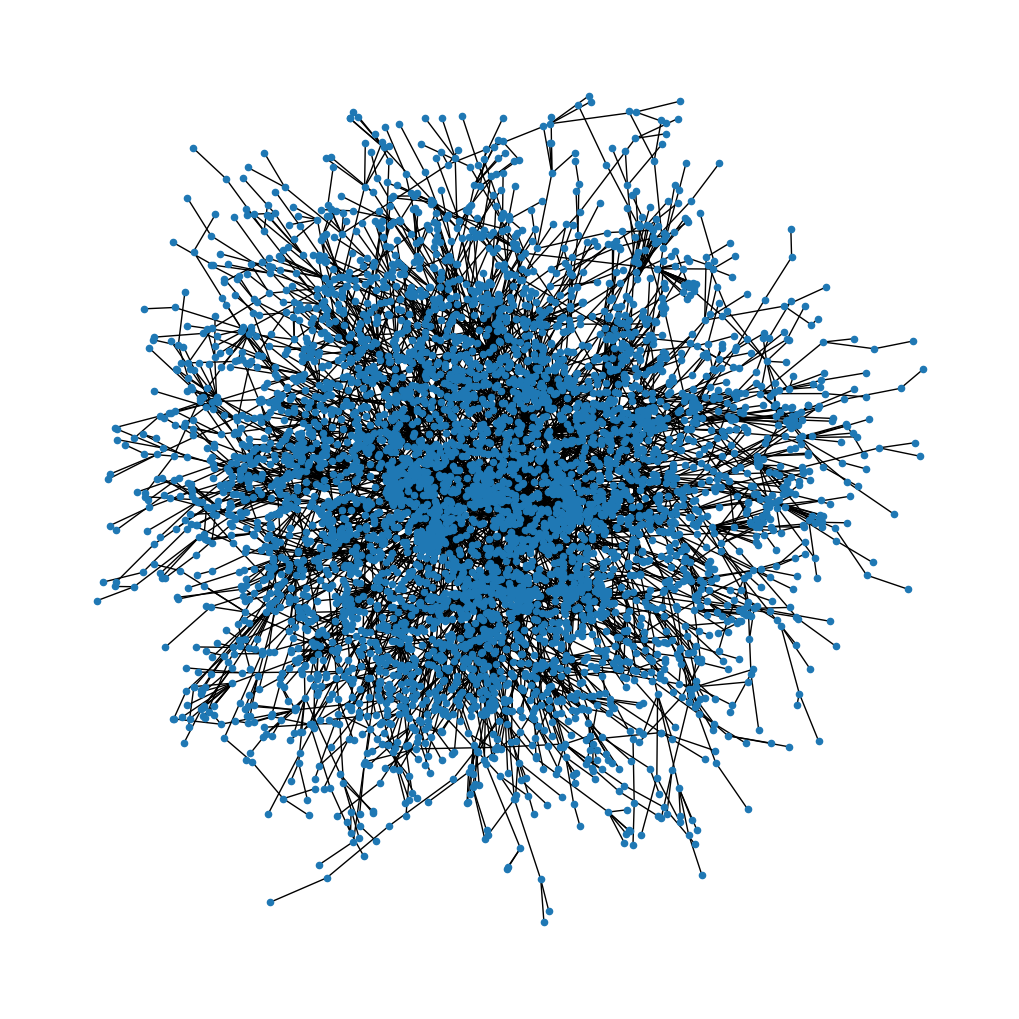

In [10]:
'''Add more nodes until you have a 5000 node network.
What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.'''

G_big = nx.Graph()
G_big.add_edge(0, 1)

for i in range(2, 5000):
    # Create a list of all nodes proportional to their degree 
    # (by flattening the edge list, the node will appear as many times as its degree)
    node_options = np.array(G_big.edges()).flatten()
    # Select a random node from the list
    new_node = i
    target_node = random.choice(node_options) 
    G_big.add_edge(new_node, target_node)

plt.figure(figsize=(10, 10))
nx.draw(G_big, node_size=20)
plt.show()

    

Max degree: 122, Min degree: 1


Text(0.5, 0, 'Degree')

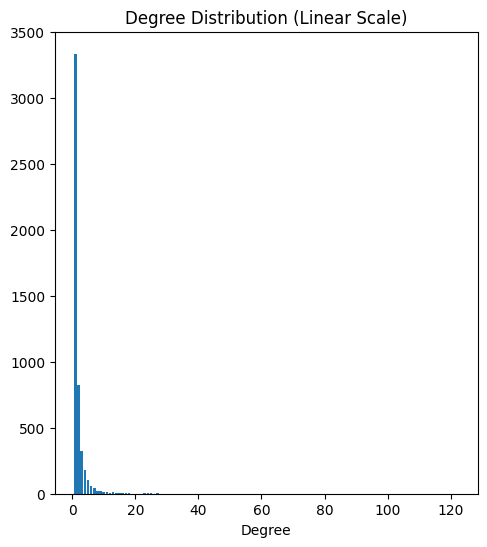

In [ ]:
'''What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.'''

degrees = [degree for node, degree in G_big.degree()]
max_degree = max(degrees)
min_degree = min(degrees)
print(f"Max degree: {max_degree}, Min degree: {min_degree}")

# Bin the degree distribution
hist, bin_edges = np.histogram(degrees, bins=range(min_degree, (max_degree+1)+1))
# Plot the distribution on linear scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
# Plot the distribution on log-log scale
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.show()

